# **APPLICATION OF MACHINE LEARNING TECHNIQUES FOR THE PREDICTION OF LANDSLIDES**

<img src=88x31.png  width="10%" style="float: left;">

by A.Richter


## Overview of the notebook:
   
   1. [INTRODUCTION](#intro)
   2. [BASICS AND LANDSLIDES DATA](#basics)
   3. [DISCUSSION OF MACHINE LEARNING METHODS](#MLtechniques)
   4. [APPLICATION ON THE DATASET](#application)
   5. [CONCLUSIONS AND FUTURE WORK](#conclusions)

**Preface:**
Different machine Learning techniques are evaluated on spatial data of mountainous regions to find a useful methodology for predicting the susceptibility of landslides. Different data-sources are combined to training- and testing-datasets to perform binary classification. Spatial-crossvalidation and ROCAUC-metrics are used to compare the performance of the classifiers. Results are compared in form of learning curves and posterior probability maps over the area of interest.



## Introduction: <a name="intro" ></a> 

Landslides are geological phenomena and a generic term for a wide range of ground movements like rockfalls, debris flows or failure of slopes. They are geohazards with increasing frequency and a danger for many human settlements in mountainous regions. The study of past landslides can help to understand the reasons why these events occur and therefore help to quantify the risk in affected areas. The area of interest (AOI, cf. figure 1 marked by a red square) in the north-east of Afghanistan is one of the most vulnerable regions in the world according to landslides.

<img src=figures/OverviewMap.png  width="90%" style="left;"> 


Ref: Overview map, Area of Interest (red Square), Source: APA, Der Standard (https://www.derstandard.at/story/1397522393237/suche-nach-opfern-von-erdrutsch-in-afghanistan-eingestellt)

Finding a method to quantify or predict the future development of the landslide susceptibility for a certain area from generally available data would be a great advantage compared to the elabo- rate costs of the in-situ characterizing of single landslide events. One big problem is to estimate the temporal changes of the af- fected landscapes which can only be roughly achieved. Land-
slide inventories, if available, mainly present records with spatial information on where a landslide happened and how big the slid- ing area was. Temporal information on when a specific landslide happened are often not present. Making predictions for a future event is therefore a complex task. Most available data is more or less sensitive to temporal changes, e.g. landuse or precipitation grids but due to the lack of adequate data nevertheless widely used. Lithology and elevation-models for example are preferable predictor variables as their temporal changes are much smaller. The lithology of the study area mainly consists of sedimentary (sands and clays) as well as sporadic plutonic or vulcanic rocks situated in heights between 1300m and 2200m a.s.l. The rea- sons for the occurrence of a landslide event can be very diverse like general tectonic movements by earthquakes or erosions by wind, ice and heavy rainfall seasons. General mining activities are also one of the main causes. The risk or the susceptibility for a failure of slope depends on the hygroscopicity of the soil hori- zons, the slope angle itself and the presence or absence of vege- tation stabilizing the slope. To implement the analysis of the data SciKit-learn/SciKit-image Python-Libraries, the GPML-Toolbox (Rasmussen, 2008), TopoToolbox2 (Schwanghart, 2014) and the Matlab-Toolboxes by Mark Schmidt (Schmidt, M. 2015) were used. The following report is divided into five sections. Section two of this work is giving an analysis and overview of the data while section three describes the used machine learning methods. Section four presents the results and detailed interpretations of the performance of used the techniques and section five finishes with an outlook on future work in this field of study.




## 2 BASICS AND LANDSLIDES DATA <a name="basics" ></a> 

2.1 Problem Setting

Learning problems for such a scenario can be formulated in dif- ferent ways. The basic machine learning approach is a binary classification. Imagine the earth’s surface coated by a regular grid. Each grid cell defining an area of e.g. 35 by 35 meters. Earth’s curvature is neglected as the AOI is assumed to be pro- portionally small. If no landslide occurred in an individual grid cell this cell can be assigned by the number 0 (e.g. 0 or -1, negative class). If a landslide or debris flow happened in that area, it is labelled by a value of 1 (positive class). The different characteris- tics of a landscape like elevation, slope, lithology or the distance of a location to a geologic fault or a nearby road can be used as inputs for the classification problem. In geographic information systems (GIS) such data can be stored in form of georeferenced images which are generally called raster-layers.( The pixel-values in a raster-layer are stored in matrix-form.) To avoid bias between GIS and machine learning terminology features and instances of the learning problem are defined as follows. The raster-layers represent the features or predictor variables of the learning prob- lem and the pixel-values inside a raster-layer refer to the elements of an instance-vector. The aim is now to find a model for predic- tion of the class label (positive or negative class) at an unseen position. The model is learned from the data (predictor-matrix and true labels) of a training area and used to predict the class labels of a testing area in another region. But not only the class label also the posterior probability at a certain position is important to assess the susceptibility for a failure of slope. For binary classification a lot of machine learning techniques are available e.g logistic regression, support vector machines, gaussian processes or random forest classifiers. Which one of them has the best performance on the available data is one of the discussed questions.

2.2 Data preprocessing

All basic input raster-layers and their properties are shown in the following table 1. The word layer is also used in geological contexts meaning the horizons of ground sediments. In this paper it is only used in the context of GIS meaning a raster image layer. The basic data files in Tif-image format were georeferenced to the WGS84-UTM coordinate system (WGS84 UTM 42N, EPSG: 32642). In a first step Rasterdata of the AOI was prepared using the Matlab-based software package TopoToolbox and ESRI’s ArcGIS Software for geographical data processing. TopoToolbox was used to derive the additional layers SLOPE, CURVATURE, ASPECT of SLOPE and DISTANCE to STREAMS (Watersheds) from the original digital elevation model. ESRI’s Spatial Analyst Tool Euclidian Distance was used to calculate distance rasters for the geological faults (DISTANCE to FAULTS), the roads (DIS- TANCE to ROADS) and the settlement locations (DISTANCE to SETTLEMENTS). Each pixel value representing the distance to the nearest object. Different cell sizes were resampled using a nearest neighbour interpolation to retain the original pixel-values
and to provide all layers with the same cell size, geolocation and
alignment. The landslide areas (141 vector polygons) representing the True-Labels were converted to a binary raster-dataset of
same spatial reference and resolution. The 141 individual landslide polygons were not distinguished between small and large
sliding areas as only the resampled pixels inside the areas were counted with a class value = 1. This assumption will be discussed
in detail in section 5. Unfortunately the landslide polygons do not
provide temporal information in form of a timestamp. They were
digitized from aerial images in which a temporal filing was not
possible. In a second step all prepared Tif-files were imported to
a Python (Jupyter) environment and converted to matrix form to
obtain Train- and Testing-datasets. The raster-layers were vertically aligned one upon the other in from of a three-dimensional
data-structure like a cube with the lowermost layer representing
the true labels. Choosing one pixel in the topmost layer and looking down at the same pixel in all layers below a vertical vector
of values describing the properties of this spatial location can be
extracted. Transposing this vertical vector is giving an instance
in the predictor matrix of the learning problem. The last value
represents the true label which should be predicted by the model.
The true labels are shown in figure 2 as red polygons and in figure 3 as a raster-layer representing the positive class = 1(red) and the negative class = 0 (blue). Twenty different layers according to table 1 were generated over the AOI representing the attributes of the Training- and Test-datasets. The most important sources are shown in the following figures together with their histograms to have a better view on the subjacent statistical distributions in the data. In case of the road network it is obvious that there are much more locations very near to each road and thereby a lot of smaller distance values in the data resulting in a skewed distribution as shown in the histogram (cf. figure 4). The log-transformation in equation (1) can be used to lower the effect of the skewness


In [1]:
import glob
Folder='data/AOI3_V7_Train/'
TIFs=glob.glob(Folder+"*.tif")
TFWs=glob.glob(Folder+"*.tfw")
print(TIFs)

['data/AOI3_V7_Train/TIF_B4.tif', 'data/AOI3_V7_Train/TIF_AFG_GDEM_V21.tif', 'data/AOI3_V7_Train/TIF_B5.tif', 'data/AOI3_V7_Train/TIF_B7.tif', 'data/AOI3_V7_Train/TIF_B6.tif', 'data/AOI3_V7_Train/TIF_ASPW.tif', 'data/AOI3_V7_Train/TIF_ASPS.tif', 'data/AOI3_V7_Train/TIF_B2.tif', 'data/AOI3_V7_Train/TIF_B3.tif', 'data/AOI3_V7_Train/TIF_DistStreams.tif', 'data/AOI3_V7_Train/TIF_ASPE.tif', 'data/AOI3_V7_Train/TIF_EucDist_roads.tif', 'data/AOI3_V7_Train/TIF_B1.tif', 'data/AOI3_V7_Train/TIF_lith_type.tif', 'data/AOI3_V7_Train/TIF_lc93_32.tif', 'data/AOI3_V7_Train/TIF_Curvature.tif', 'data/AOI3_V7_Train/TIF_Slope.tif', 'data/AOI3_V7_Train/TIF_TrueLabels.tif', 'data/AOI3_V7_Train/TIF_B10.tif', 'data/AOI3_V7_Train/TIF_B11.tif', 'data/AOI3_V7_Train/TIF_EucDist_badakhshan.tif', 'data/AOI3_V7_Train/TIF_precip.tif', 'data/AOI3_V7_Train/TIF_NDVI.tif', 'data/AOI3_V7_Train/TIF_EucDist_faults.tif', 'data/AOI3_V7_Train/TIF_ASPN.tif', 'data/AOI3_V7_Train/TIF_B8.tif', 'data/AOI3_V7_Train/TIF_B9.tif']


In [4]:
import numpy as np
import skimage.io as skio 
i=0
LayerTrain=dict()

for filr in TIFs:
    
    if '_AF' in filr or '_B' in filr or '_C' in filr or '_Di' in filr or '_E' in filr or '_p' in filr or '_S' in filr or '_N' in filr:
        #print i, filr.split("/")[4][0:4]+'r_'+filr.split("/")[4][4:-4]
        name=filr.split("/")[2][0:4]+'r_'+filr.split("/")[2][4:-4]
        print( i,name)
        LayerTrain[name]=np.float32(skio.imread(filr))
        print( LayerTrain[name].shape)
        print( 'Anzahl NaN : {}'.format(np.sum(np.isnan(LayerTrain[name])*1)))
            
        if 'DistStreams' in filr or 'faults' in filr or 'roads' in filr or 'badakh' in filr:
            LayerTrain[name]=np.log(LayerTrain[name])
            
            print( 'Anzahl NaN : {}'.format(np.sum(np.isnan(LayerTrain[name])*1)))
            print( 'Anzahl infty : {}'.format(np.sum(np.isinf(LayerTrain[name])*1)))
            LayerTrain[name][np.isinf(LayerTrain[name])]=0
            print( 'Wert infty durch 0 ersetzt / Anzahl infty jetzt: {}'.format(np.sum(np.isinf(LayerTrain[name])*1)))
                
    elif '_AS' in filr or '_l' in filr :
        #print i, filr.split("/")[4][0:4]+'n_'+filr.split("/")[4][4:-4]
        name=filr.split("/")[2][0:4]+'n_'+filr.split("/")[2][4:-4]
        print( i,name)
        LayerTrain[name]=np.float32(skio.imread(filr))
        print( LayerTrain[name].shape)
        print( 'Anzahl NaN : {}'.format(np.sum(np.isnan(LayerTrain[name])*1)))
            
        if 'lc93' in filr:
            LayerTrain['TIF_n_LanduseRAL'] =((LayerTrain.get(name) == 1) | (LayerTrain.get(name) ==5))*1.0
            print( 'TIF_n_LanduseRAL ', LayerTrain['TIF_n_LanduseRAL'].shape)  #Rainfed Agricultural Land....ok
            LayerTrain['TIF_n_LanduseRL']  =( LayerTrain.get(name) == 2)*1.0
            print( 'TIF_n_LanduseRL ', LayerTrain['TIF_n_LanduseRL'].shape)    #Range Land....ok
            LayerTrain['TIF_n_LanduseIRA'] =((LayerTrain.get(name) == 4) | (LayerTrain.get(name) ==9) |(LayerTrain.get(name) ==10))*1.0
            print( 'TIF_n_LanduseIRA ', LayerTrain['TIF_n_LanduseIRA'].shape ) #Irrigated Agricultural Land....ok
            
            # ----------------------------------------------- 
            #plt.imshow(TIF_lc93_32 ==3)                                            #Sandcover, !!!!!nicht vorhanden
            #plt.imshow(TIF_lc93_32 ==6)  ==8) ==14)                               # % Waterbody and Marshland !!!! nicht vorhanden
            # TIF_lc93_32==7)  % Fruit Trees.......... Fruchtbäume)  !!!nicht vorhanden
            #plt.imshow(TIF_lc93_32 ==11,12,13)  % Vineyards  .......... Weinberge) % Forest and Shrubs ... !!!nicht vorhanden
            #plt.show()
            
            del LayerTrain[name] 
        if 'lith' in filr:
            LayerTrain['TIF_n_VOLC'] =(LayerTrain.get(name) == 1)*1.0  # % Volcanic ...... Vulkanisches Gestein
            print( 'TIF_n_VOLC ', LayerTrain['TIF_n_VOLC'].shape)
            LayerTrain['TIF_n_SEDI'] =(LayerTrain.get(name) == 2)*1.0  # % Sedimentary ... Sedimente
            print( 'TIF_n_SEDI ', LayerTrain['TIF_n_SEDI'].shape)
            LayerTrain['TIF_n_PLUT'] =(LayerTrain.get(name) == 3)*1.0  # % Plutonic....... Plutonisches Gestein
            print( 'TIF_n_SEDI ', LayerTrain['TIF_n_SEDI'].shape)
            
            #TIF_META= (TIF_lith_type == 4) # % Metamorphic.... Metamorphes Gestein .... nicht vorhanden!!!! 
            del LayerTrain[name]                   
            

    elif '_Tr' in filr:
        #print i, filr.split("/")[4][0:-4]
        name =filr.split("/")[2][0:-4]
        print( i, name)
        LayerTrain[name]=np.float32(skio.imread(filr))
        LayerTrain[name]=(LayerTrain.get(name) > 0)*1.0             # TrueLabels auf Intervall [0,1] bringen
        print( LayerTrain[name].shape)
        print( 'Anzahl NaN : {}'.format(np.sum(np.isnan(LayerTrain[name])*1)))
            
    i+=1

0 TIF_r_B4
(607, 948)
Anzahl NaN : 0
1 TIF_r_AFG_GDEM_V21
(608, 948)
Anzahl NaN : 0
2 TIF_r_B5
(607, 948)
Anzahl NaN : 0
3 TIF_r_B7
(607, 948)
Anzahl NaN : 0
4 TIF_r_B6
(607, 948)
Anzahl NaN : 0
5 TIF_n_ASPW
(608, 948)
Anzahl NaN : 0
6 TIF_n_ASPS
(608, 948)
Anzahl NaN : 0
7 TIF_r_B2
(607, 948)
Anzahl NaN : 0
8 TIF_r_B3
(607, 948)
Anzahl NaN : 0
9 TIF_r_DistStreams
(608, 948)
Anzahl NaN : 0
Anzahl NaN : 0
Anzahl infty : 39458
Wert infty durch 0 ersetzt / Anzahl infty jetzt: 0
10 TIF_n_ASPE
(608, 948)
Anzahl NaN : 0
11 TIF_r_EucDist_roads
(608, 947)
Anzahl NaN : 0
Anzahl NaN : 0
Anzahl infty : 12088
Wert infty durch 0 ersetzt / Anzahl infty jetzt: 0
12 TIF_r_B1
(607, 948)
Anzahl NaN : 0
13 TIF_n_lith_type
(608, 948)
Anzahl NaN : 0
TIF_n_VOLC  (608, 948)
TIF_n_SEDI  (608, 948)
TIF_n_SEDI  (608, 948)
14 TIF_n_lc93_32
(608, 948)
Anzahl NaN : 0
TIF_n_LanduseRAL  (608, 948)
TIF_n_LanduseRL  (608, 948)


/Users/richter/anaconda3/envs/py3.6/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log


TIF_n_LanduseIRA  (608, 948)
15 TIF_r_Curvature
(608, 948)
Anzahl NaN : 0
16 TIF_r_Slope
(608, 948)
Anzahl NaN : 0
17 TIF_TrueLabels
(562, 905)
Anzahl NaN : 0
18 TIF_r_B10
(607, 948)
Anzahl NaN : 0
19 TIF_r_B11
(607, 948)
Anzahl NaN : 0
20 TIF_r_EucDist_badakhshan
(608, 948)
Anzahl NaN : 0
Anzahl NaN : 0
Anzahl infty : 2261
Wert infty durch 0 ersetzt / Anzahl infty jetzt: 0
21 TIF_r_precip
(608, 948)
Anzahl NaN : 0
22 TIF_r_NDVI
(608, 947)
Anzahl NaN : 0
23 TIF_r_EucDist_faults
(608, 948)
Anzahl NaN : 0
Anzahl NaN : 0
Anzahl infty : 8184
Wert infty durch 0 ersetzt / Anzahl infty jetzt: 0
24 TIF_n_ASPN
(608, 948)
Anzahl NaN : 0
25 TIF_r_B8
(607, 947)
Anzahl NaN : 0
26 TIF_r_B9
(607, 948)
Anzahl NaN : 0


TIF_TrueLabels


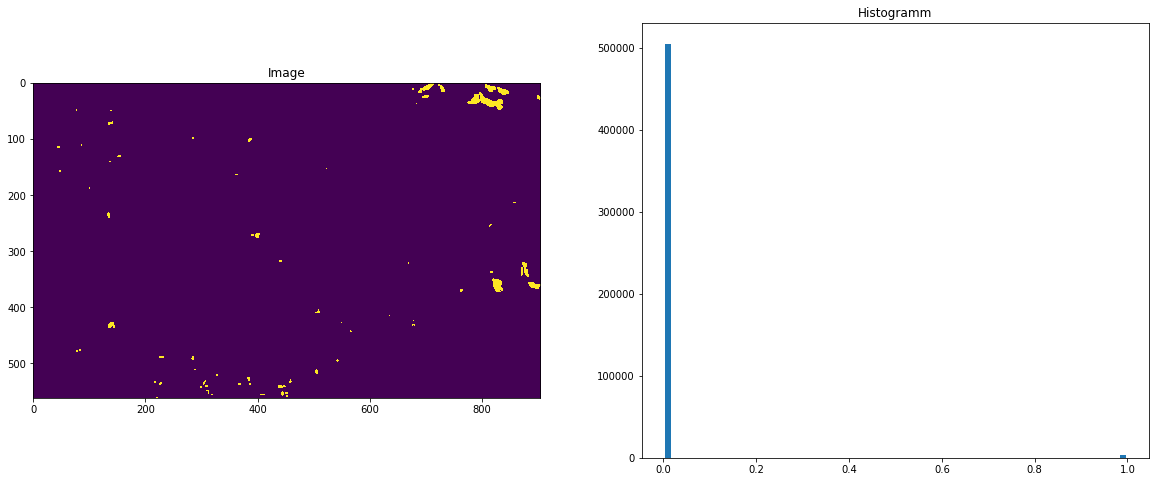

TIF_n_ASPE


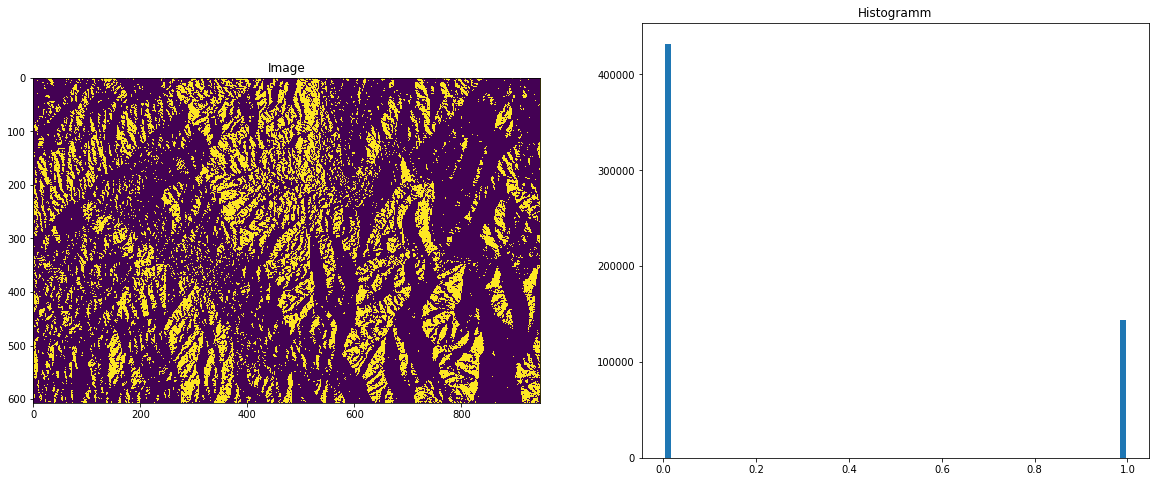

TIF_n_ASPN


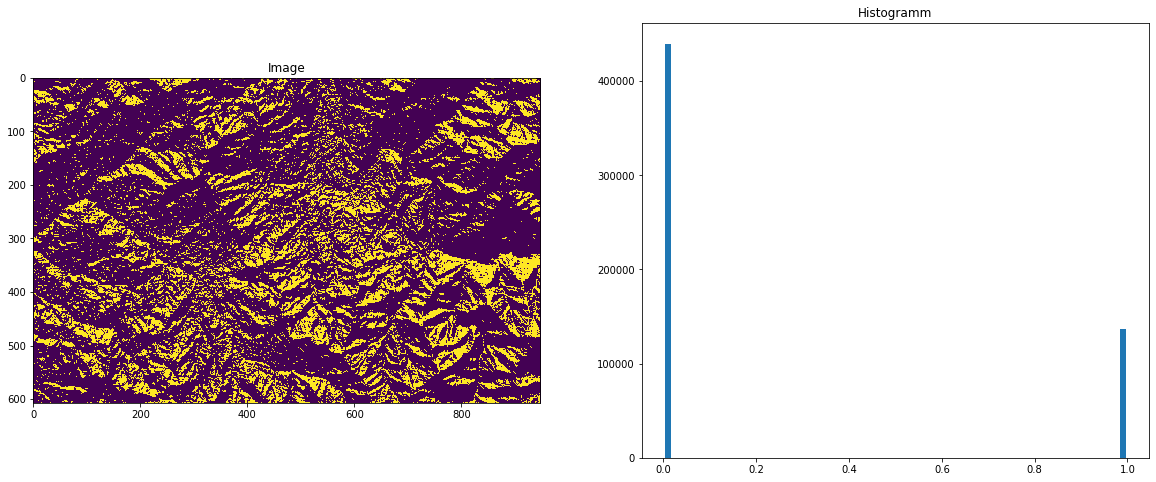

TIF_n_ASPS


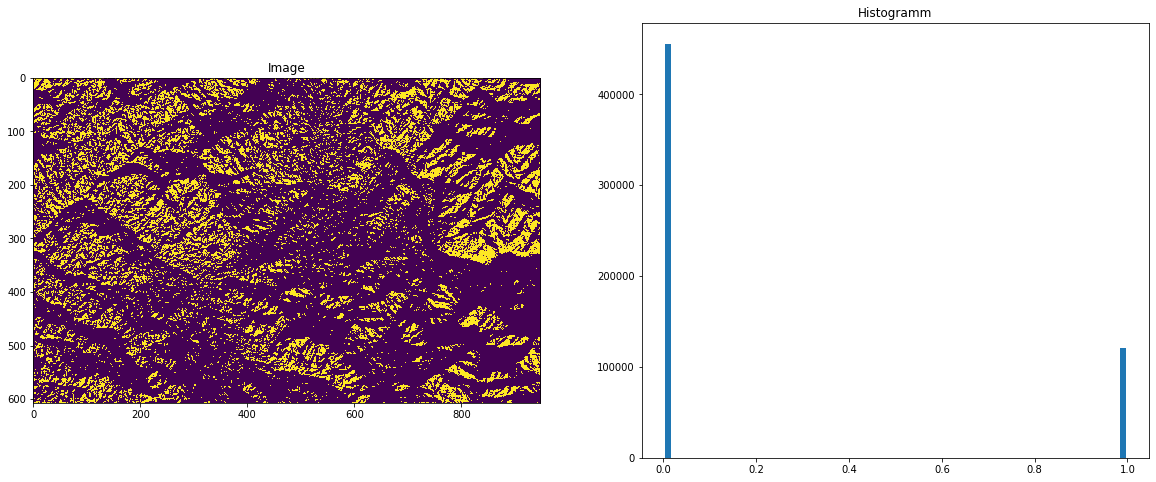

TIF_n_ASPW


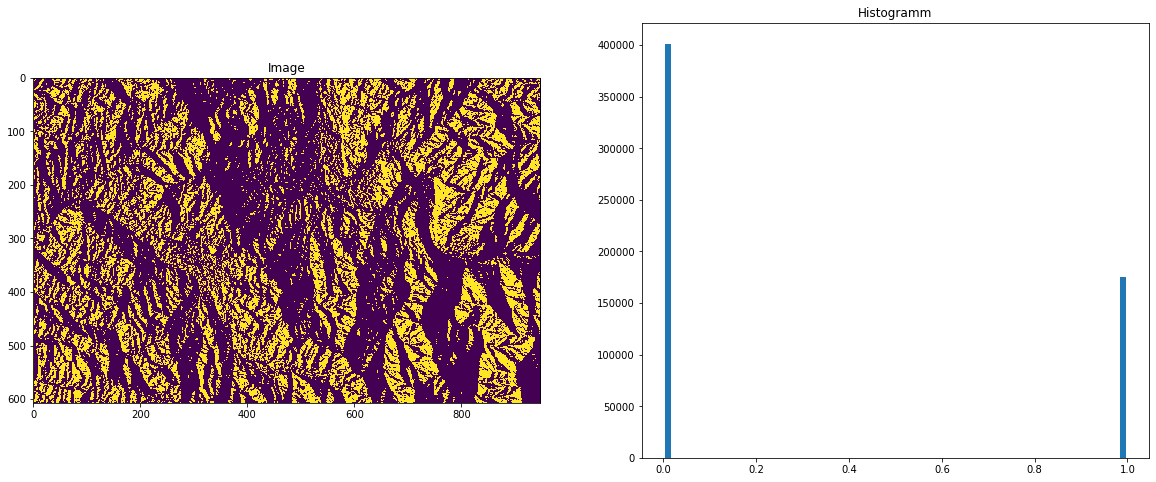

TIF_n_LanduseIRA


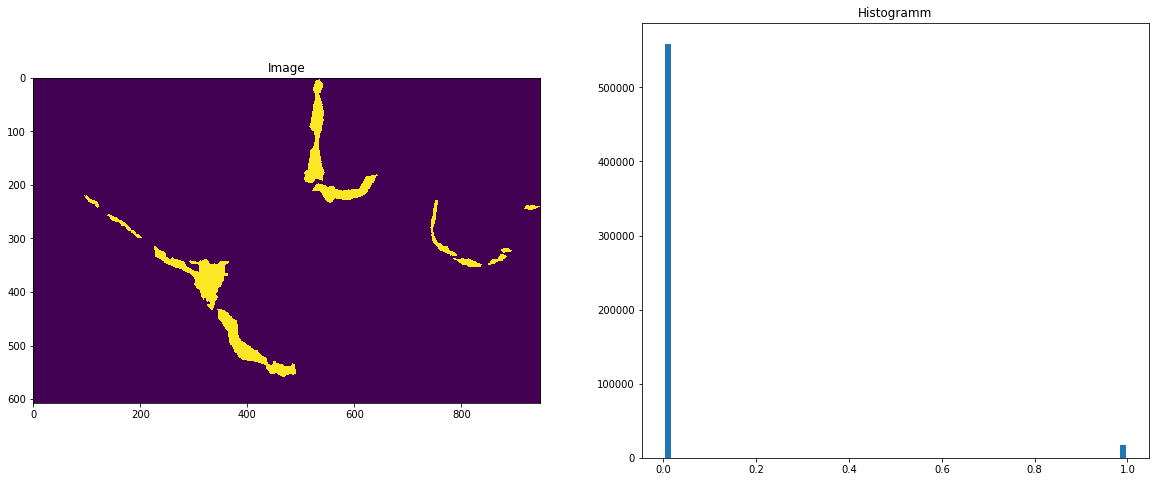

TIF_n_LanduseRAL


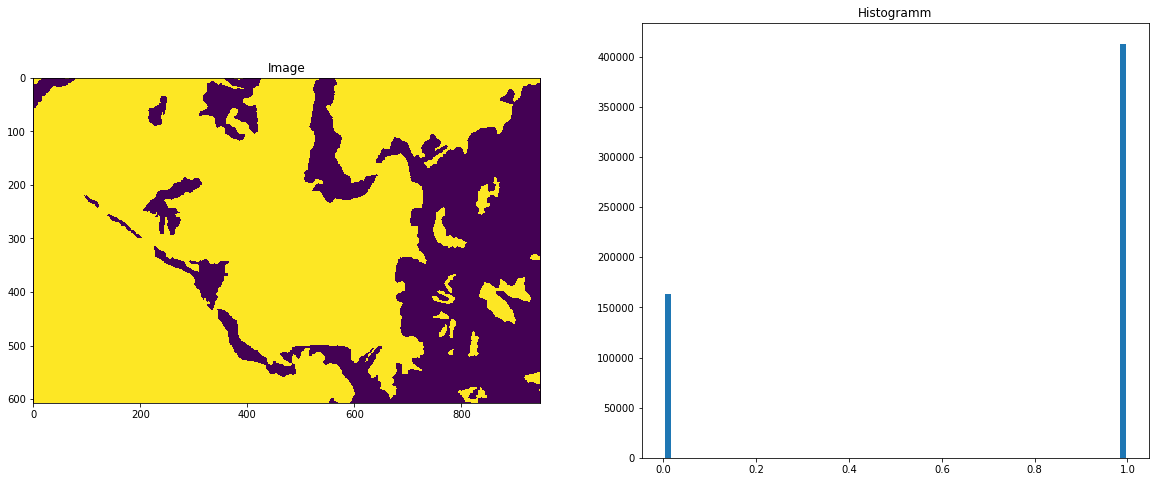

TIF_n_LanduseRL


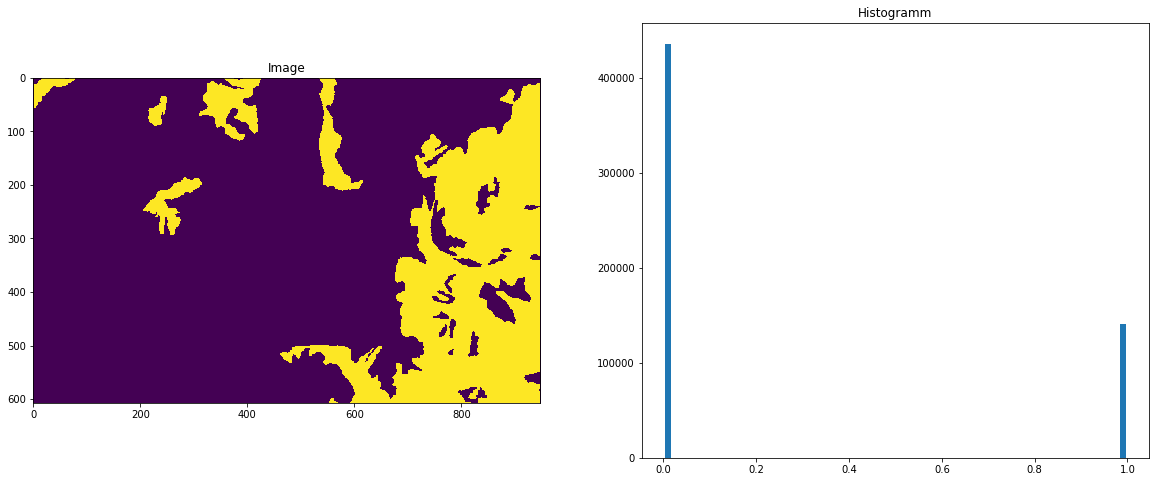

TIF_n_PLUT


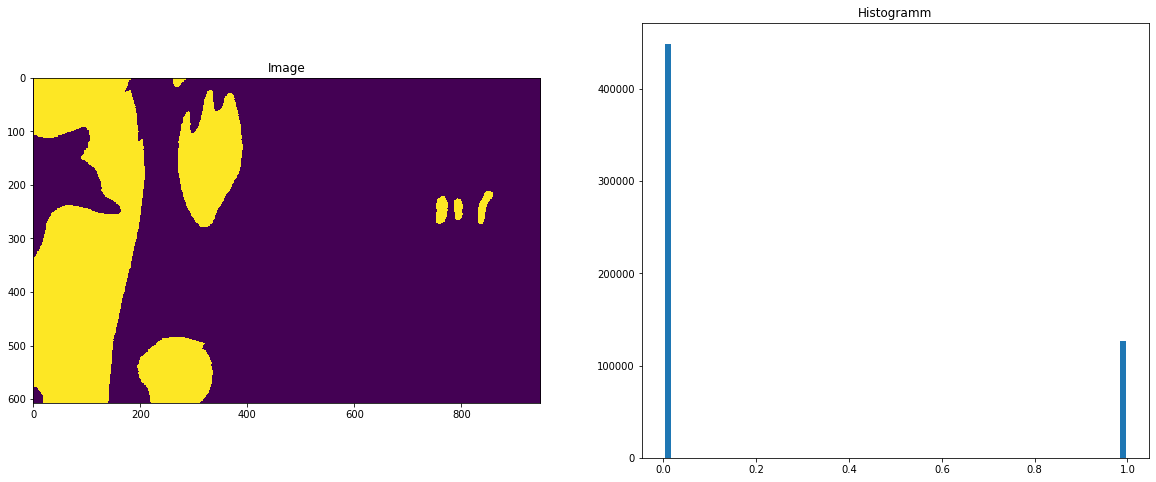

TIF_n_SEDI


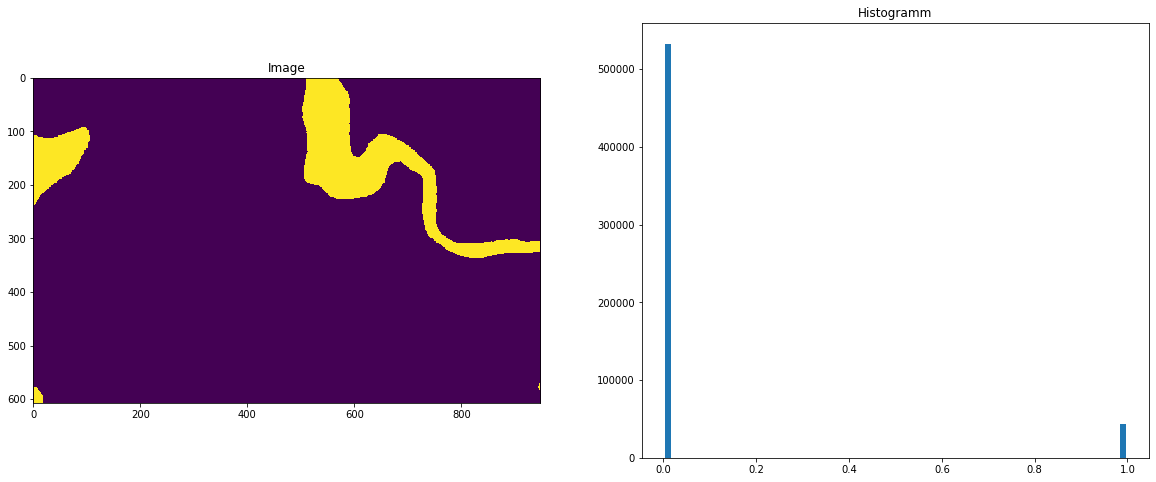

TIF_n_VOLC


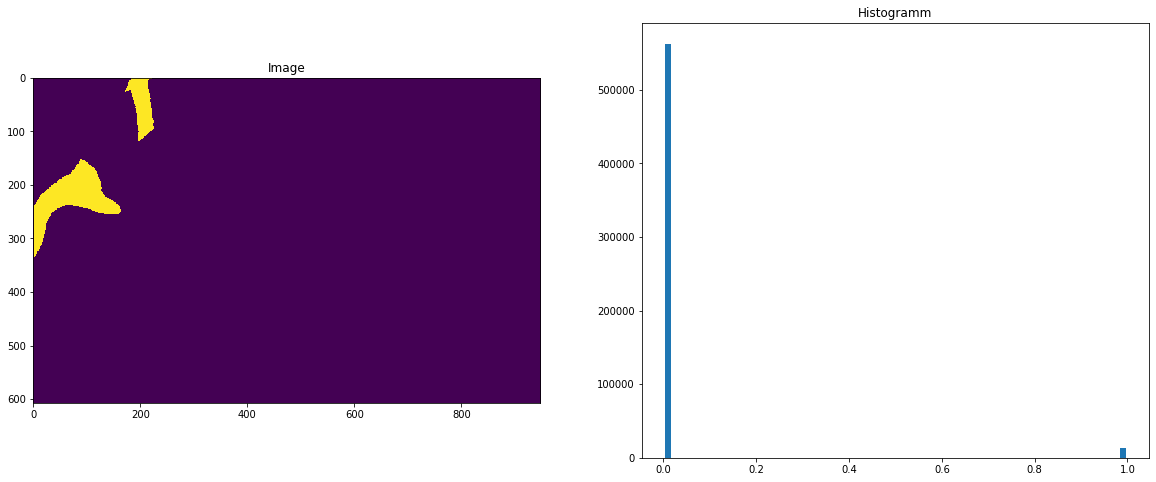

TIF_r_AFG_GDEM_V21


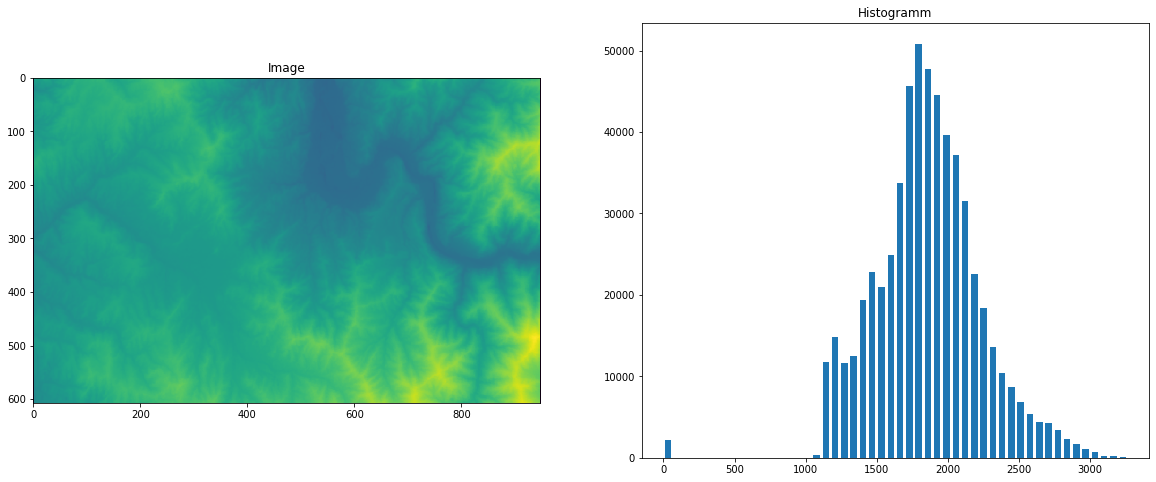

TIF_r_B1


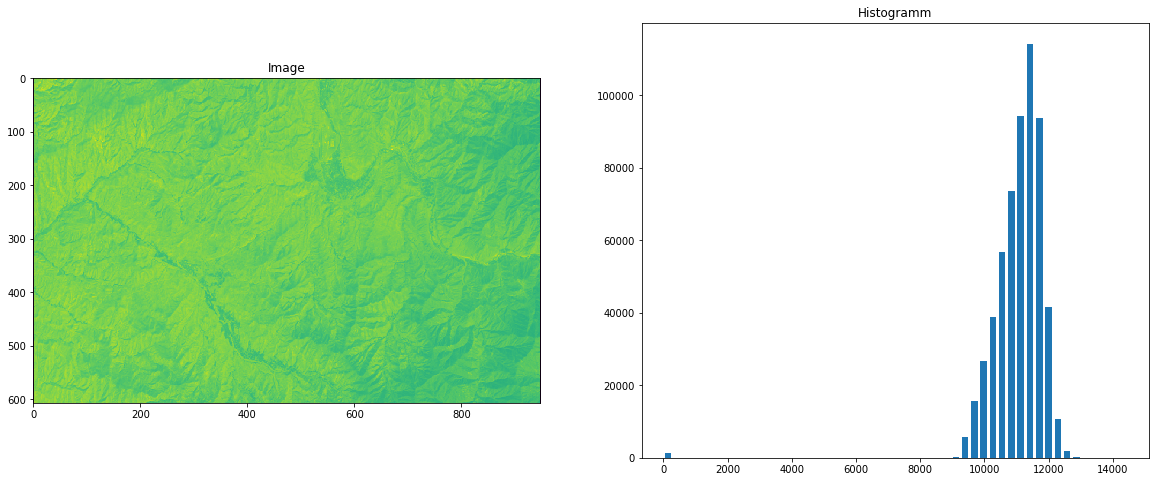

TIF_r_B10


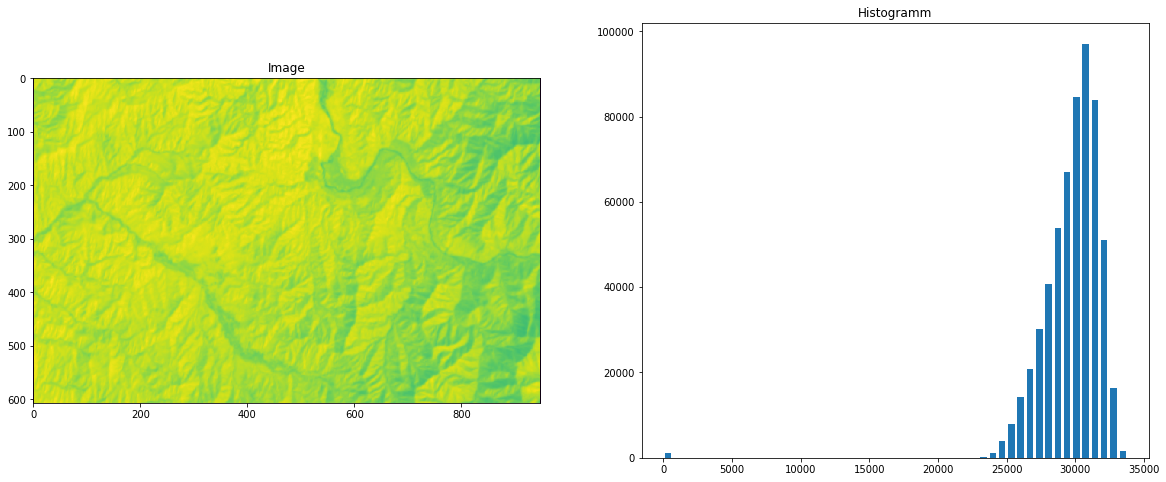

TIF_r_B11


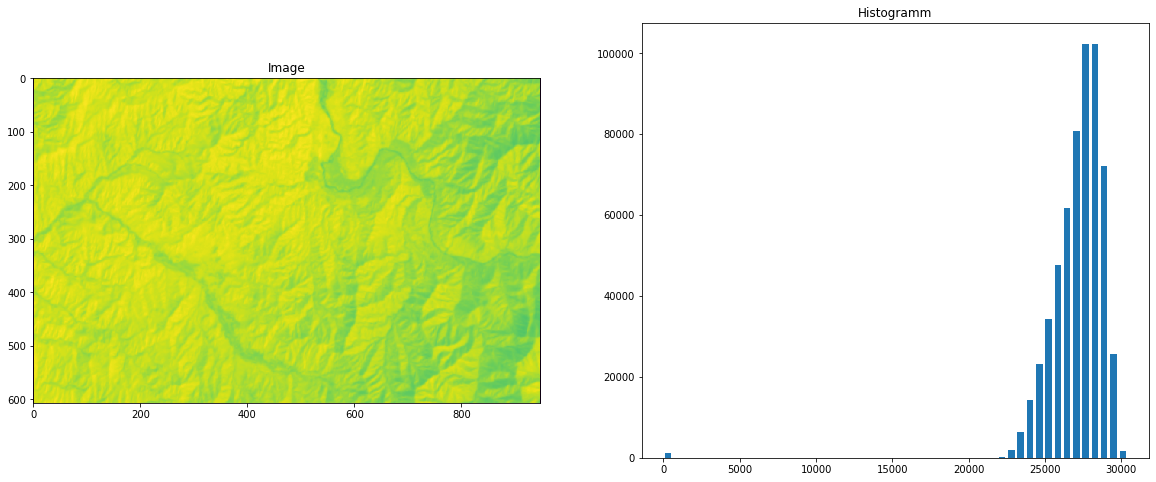

TIF_r_B2


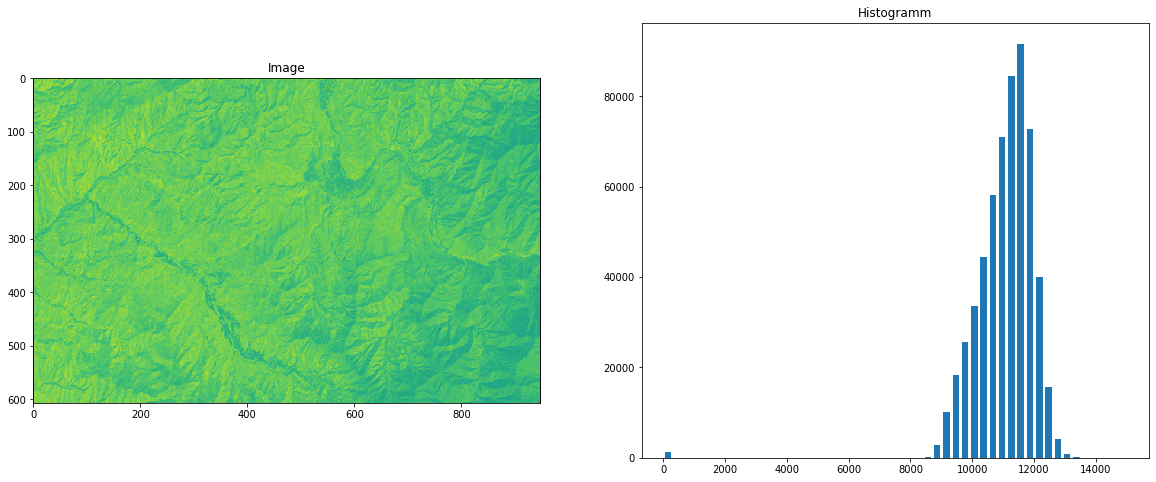

TIF_r_B3


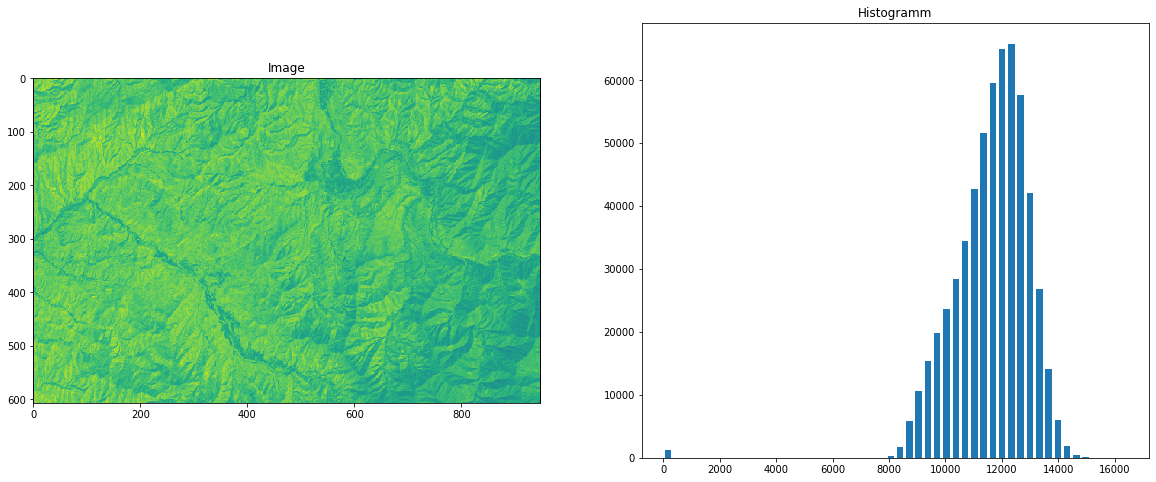

TIF_r_B4


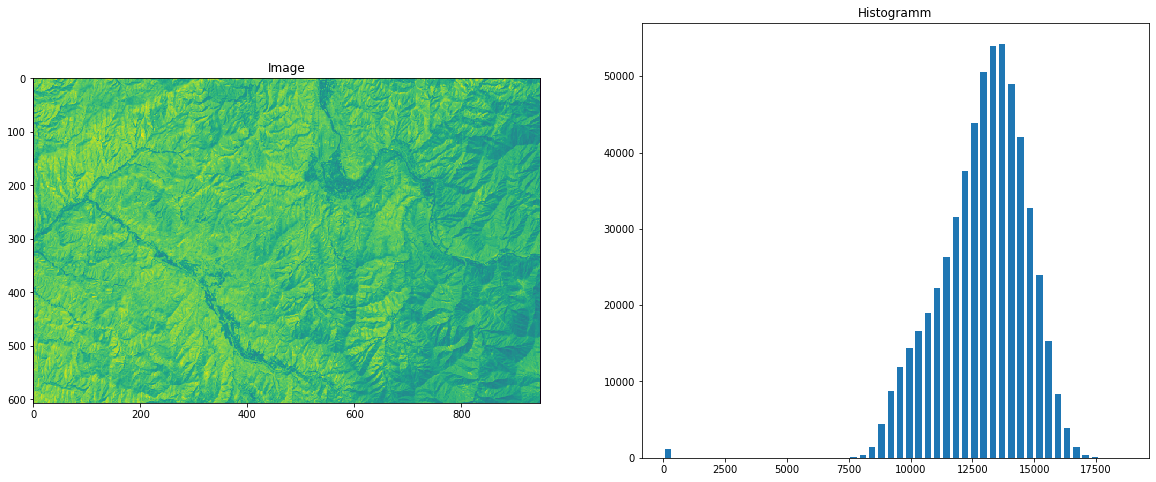

TIF_r_B5


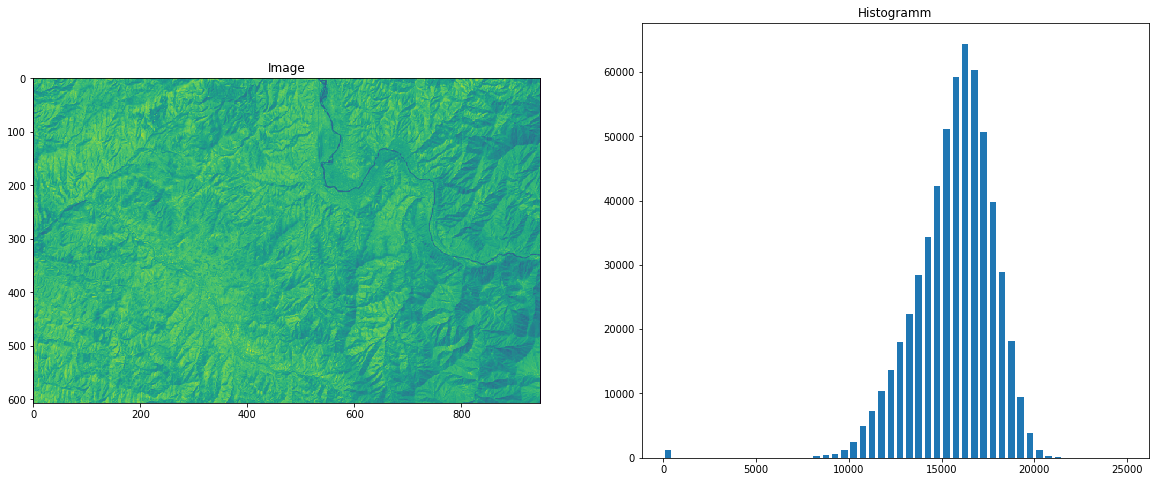

TIF_r_B6


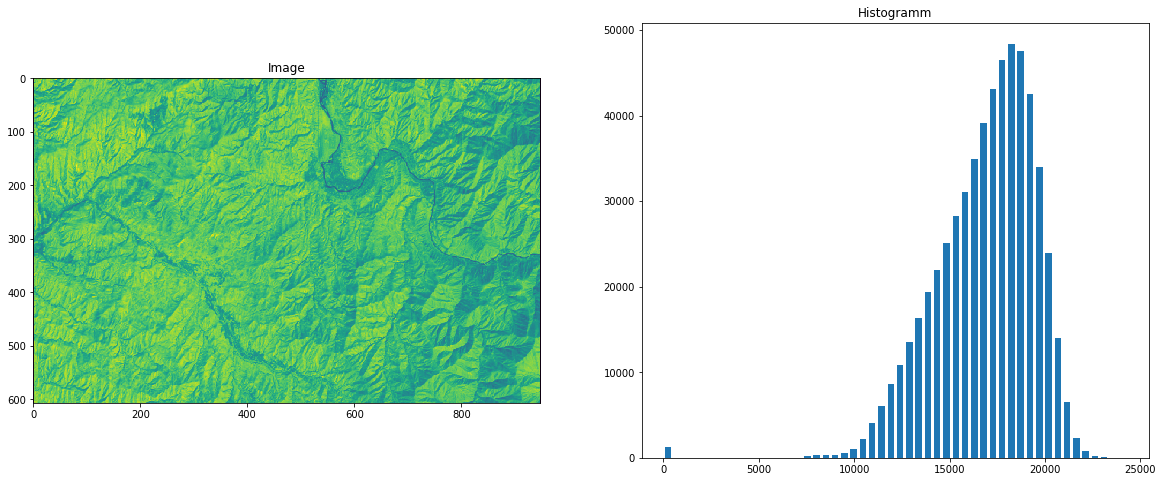

TIF_r_B7


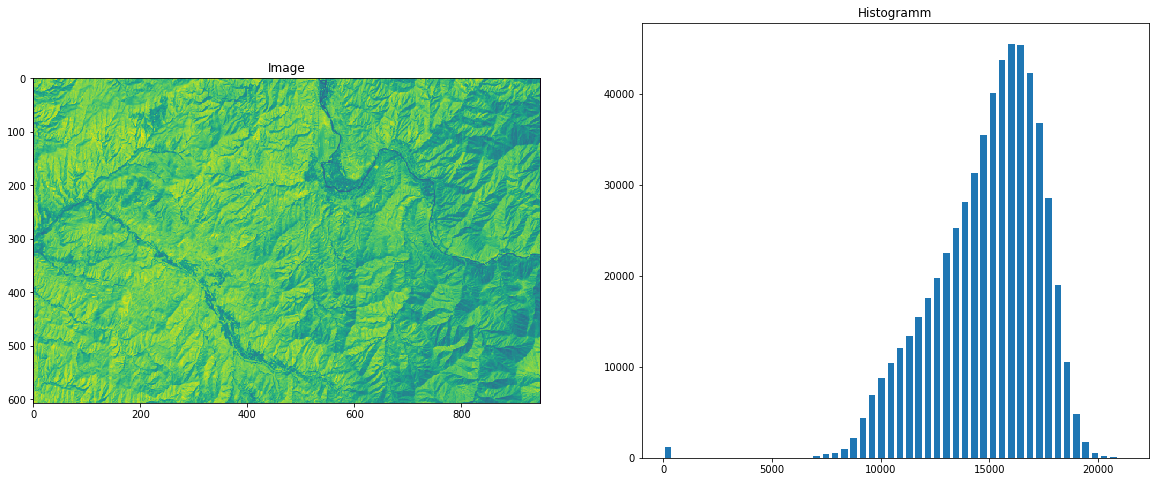

TIF_r_B8


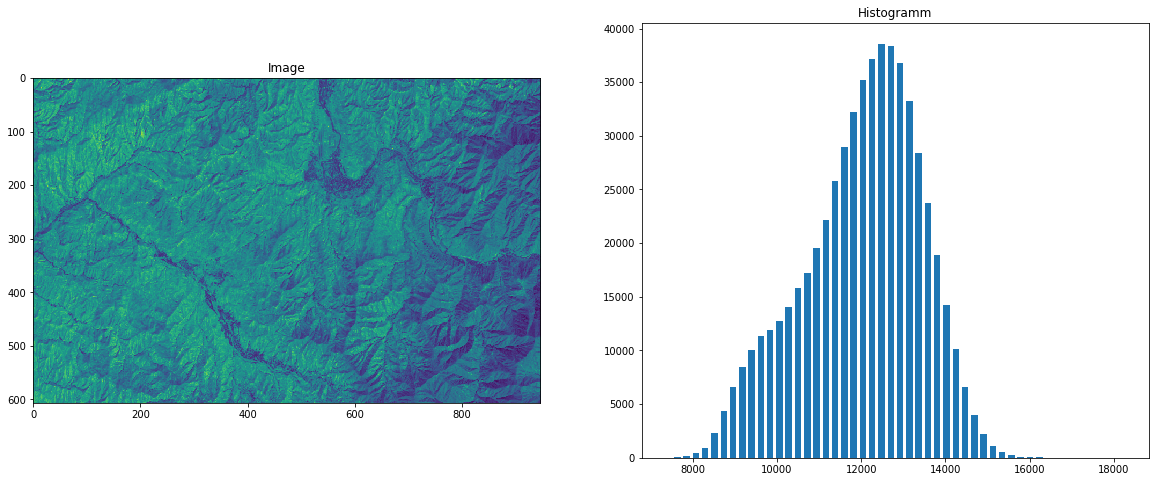

TIF_r_B9


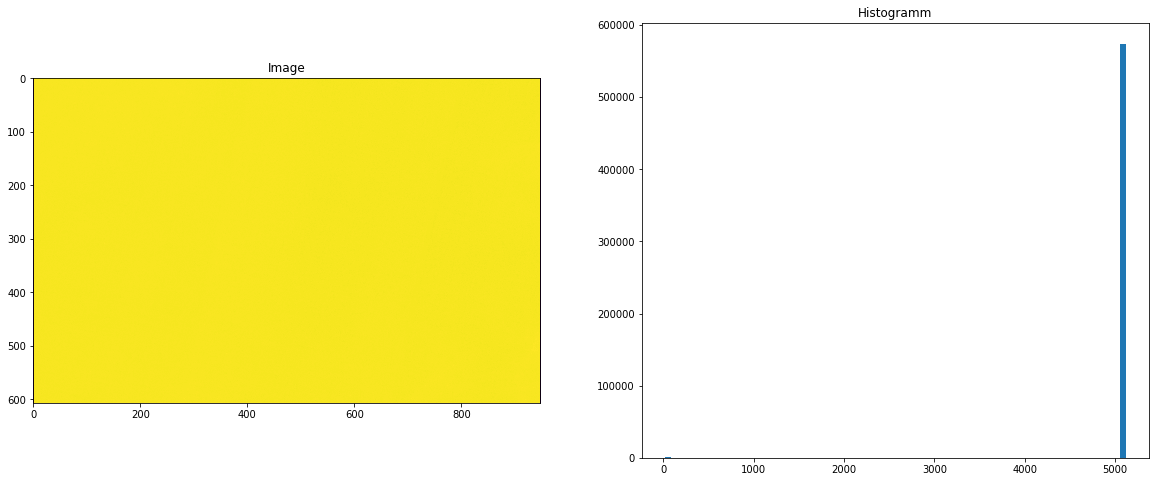

TIF_r_Curvature


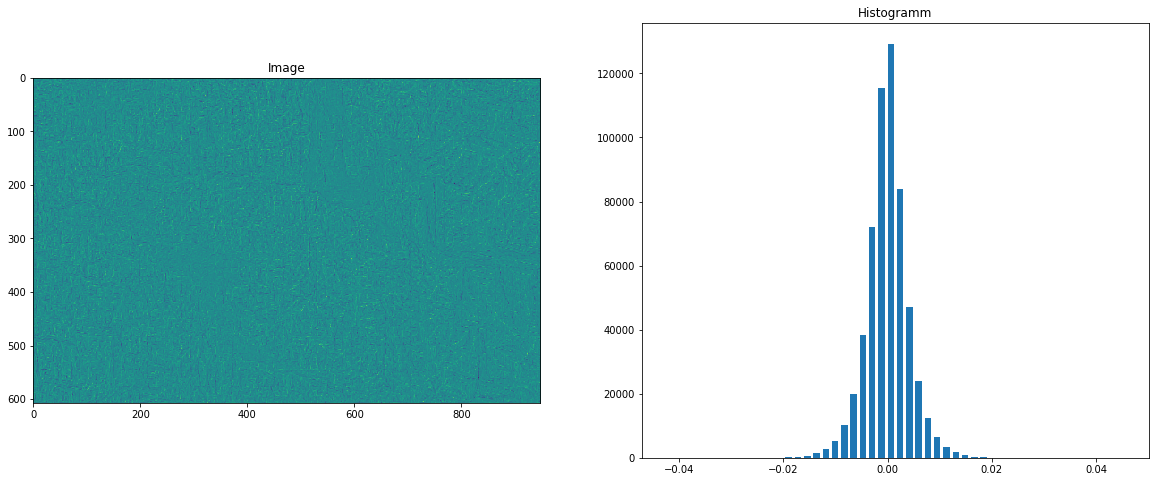

TIF_r_DistStreams


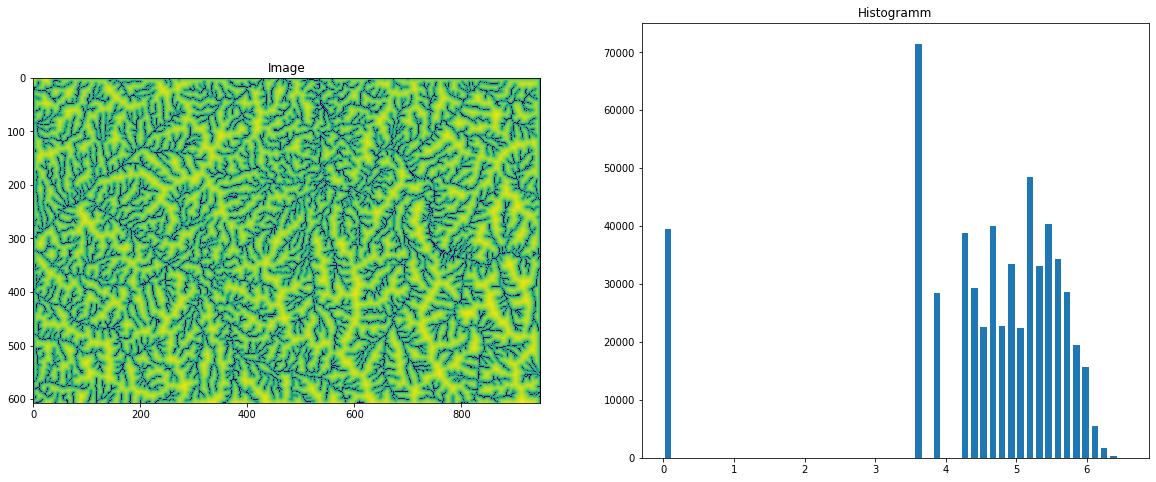

TIF_r_EucDist_badakhshan


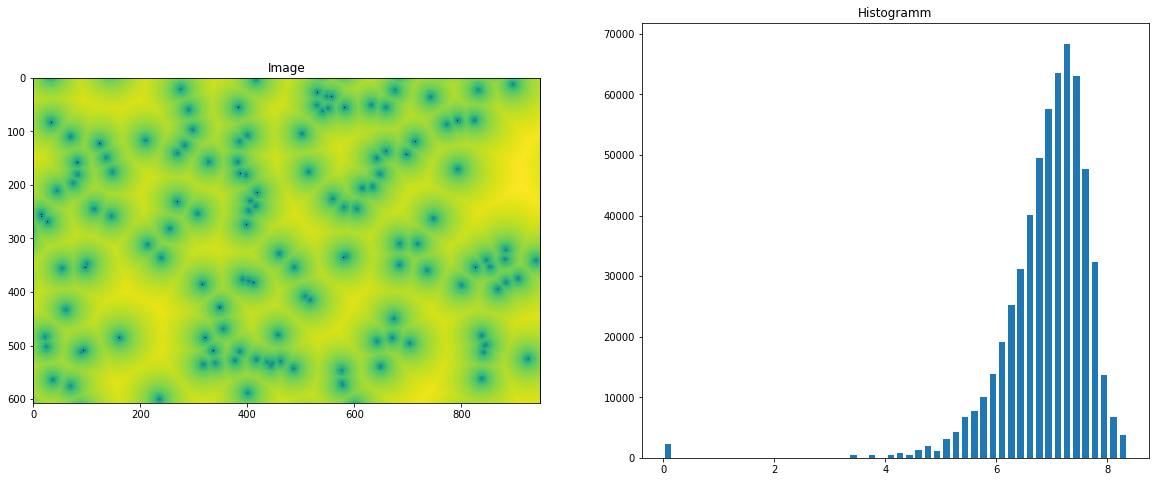

TIF_r_EucDist_faults


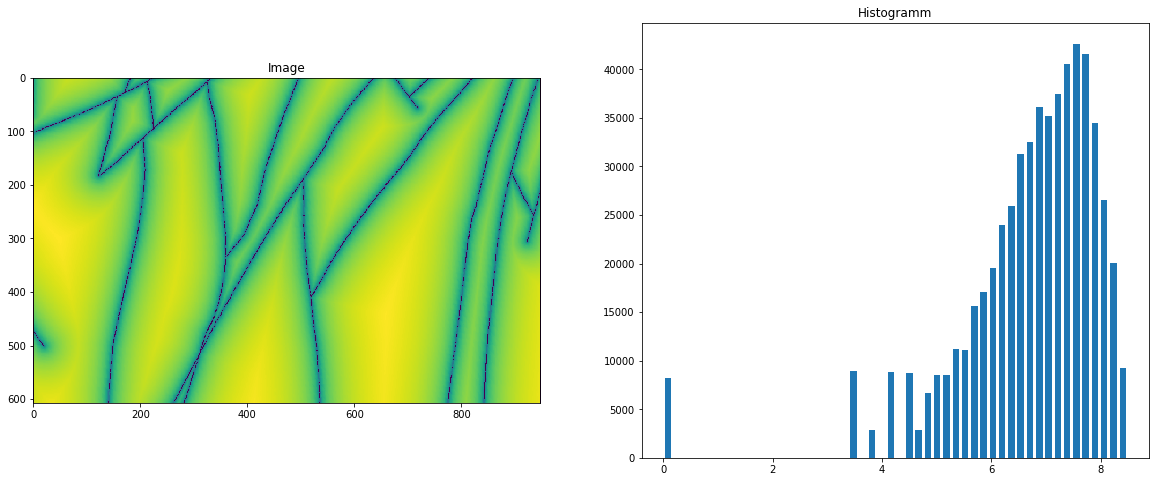

TIF_r_EucDist_roads


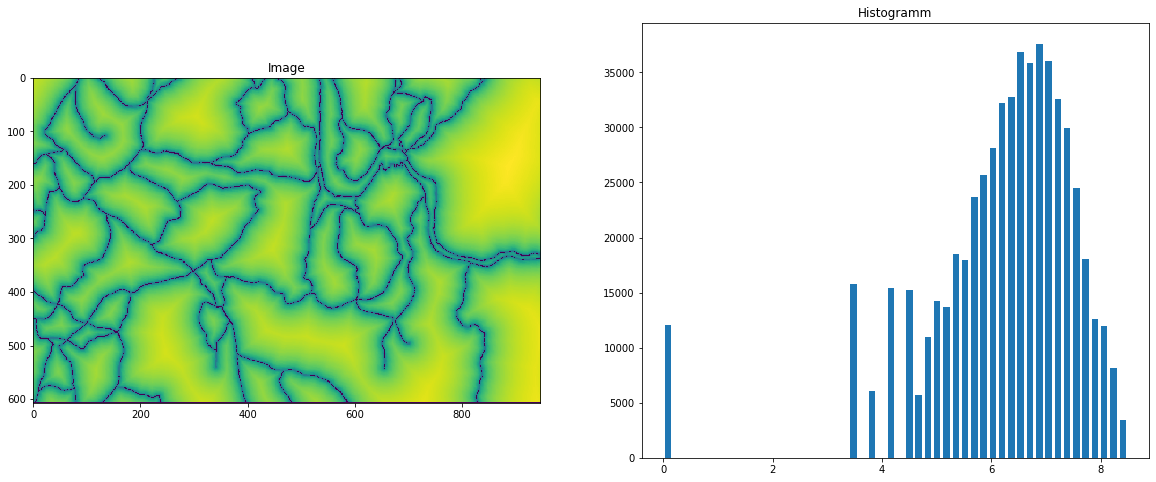

TIF_r_NDVI


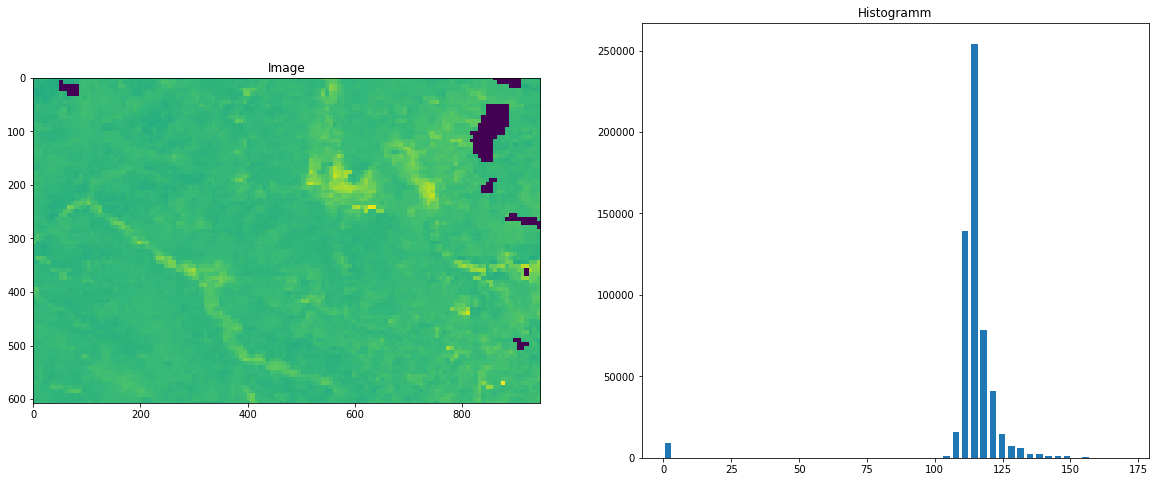

TIF_r_Slope


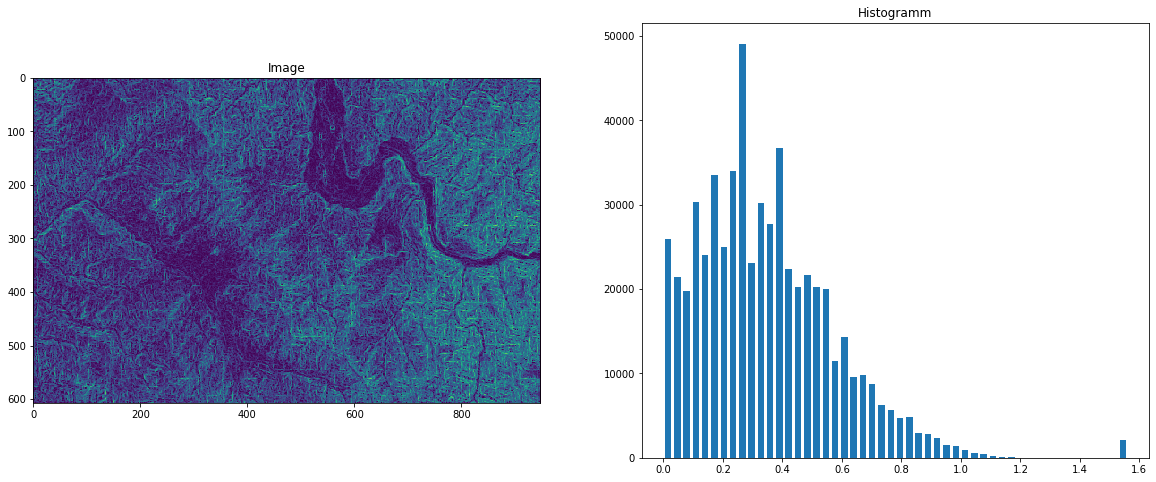

TIF_r_precip


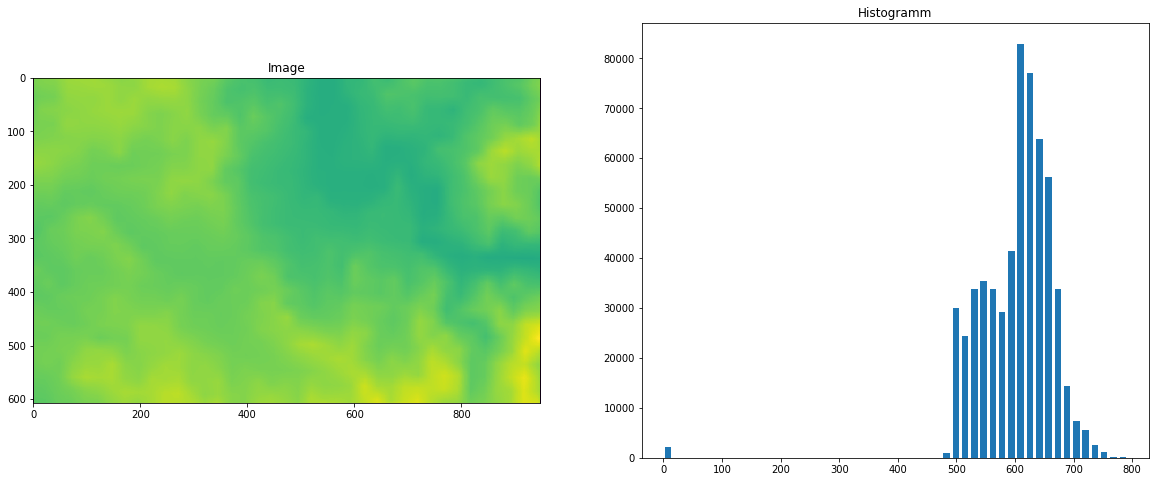

In [6]:
%matplotlib inline
from scripts.BasisFunctions import showImage
    
for layer in sorted(LayerTrain):
    print( layer)
    showImage(LayerTrain.get(layer))

## DISCUSSION OF MACHINE LEARNING METHODS <a name="MLtechniques" ></a> 

## APPLICATION ON THE DATASET  <a name="application" ></a> 

## CONCLUSIONS AND FUTURE WORK  <a name="conclusions" ></a> 

The landscape of the AOI is constantly changing by geomorphologic forces like air and water in form of wind, dust storms, rain or moisture as well as tectonic uplift, subsidence, compressions and tensions (earthquakes). Therefore temporal information of the landslide records would be a very valuable indication to distinguish different groups of similar characteristics within the data and to treat them separately if necessary. Some sliding areas might have the same cause like a triggering earthquake or the like. Other records are treated in the same way although maybe 100 years lie between them. At the moment (2016) there is no public dataset available that provides such information over the AOI or the greater area of south and central asia. The reality of the natural physical processes that in sum lead to a failure of slope can only be roughly conceived as founded above. Though the analysis of the collected data shows a rudimental understand- ing of structures in the AOI. To get a better insight more data would be needed. This lack of knowledge on the one hand could be overcome by more effort and cost intensive surveillance of the AOI. On the other hand in an area with a low population density (like the AOI) this would be economically inefficient and hardly justifiable. The data also hides an aleatoric uncertainty that can not be accessed by more and more measurements as it is inherent in the natural processes. This influence on the modelling is also not sufficiently known for a detailed prediction resulting in the fact that no model at all can be regarded as truly correct. There- fore the model outputs always have to be regarded with a critical eye.
The basic conclusion of this study is that some machine learning approaches (LLR, RFC) show equally good performance results for this landslide inventory and are adequate for a susceptibility modelling that could be committed to decision makers. Other techniques (SVM, KLR) in contrast seem to work less efficient and are not appropriate for this AOI. The landslide areas in this study were not distinguished in size (large and small records). The areas were converted to pixels disregarding if there was a connection between two different events or not. For an equal treatment independent of the sliding area one central point for each record would have been a conditionally alternative. This point approach to represent a slide was used for example by Goetz and Brenning et al., (2015) over three different areas in Lower Austria. Compared to the shown procedure here a disadvantage lies in the much smaller training set sizes as only 141 positive data-points would have been available in this dataset. In this case it could have been caused problems by too less positive data- points in the cross-validation procedures of the used techniques. The dataset used by Goetz and Brenning et al., (2015) provided nearly twice the number of positive data-points for each region. Depending on the geographic region and the local characteristics of the overlying rock machine learning techniques may behave in different ways. There is no best model at all for all regions in the world. For example in the study of Goetz and Brenning et al. the SVM model performed equally good as the generalized linear models (LLR) while also local variation in the ROCAUC’s were observed between the three tested regions in Lower Austria. So for every region a best model for prediction has to be found.
The block-size of approach b) was chosen static to fit in full land- slide records. An optimal block-size could be determined by further spatial cross-validations but would also require more calcu- lation power (bigger or more efficient hardware) than currently used in this project. The squared blocks could also be replaced by other shapes or geometric forms up to curvilinear regions de- termined by unsupervised clustering algorithms (e.g. k-means, iso-data,...) or segmentation procedures like the SLIC Superpixel algorithm. Region based or block-wise training of models should be preferred for further approaches as the spatial correlations in the data have a direct influence on the resulting ROCAUC values as shown in table 2. The extraction of random spatial regions in- stead of randomly drawing single data-points also preserves local conditions and reflects better the natural circumstances. As long as there is no temporal information at the positive data-points a grouping by the record number would also be useful if sliding areas were trimmed. Ensuring similar profiles that belong to the same slide would basically prevent a mixture of data-points with too differing characteristics. The blockwise view of approach b) could also be extended to the whole dataset (test- & training- data) instead of using only the training region. The blocks for training and testing could be picked in a checkerboard pattern of course avoiding too close neighbours to ensure independent predictions. Though this procedure would exclude a connected testing area on the other hand. In the present study a classifica- tion problem to predict a binary value was solved but the prob- lem setting could also be modified using a regression approach. A requirement for this would be the observation of a continuous variable like the mass of the moved earth or a strength value for a landslide on an adequate scale. The digitized areas of the slides can be transformed to volumes of moved material by power-law adaptation as shown in (Parker et al., 2011). Though this ap- proach is not unproblematic and can’t be used without restric- tions. The propagation of digitization-errors in the area-polygons into the volume values is always underestimated by a power-law and has to be respected in the model in other ways. Regression techniques are computationally less intensive compared to clas- sification approaches for big data problems. In some cases the regression models can be solved analytically instead of using a sophisticated gradient-decent strategy or laplace approximations. Beside the mathematical constraints machine learning techniques can be applied in areas that are unreachable or difficult to access for humans. A rough estimation of the landslide susceptibility to quantify the risk in these places is better than nothing at all. Natu- rally the used data has a bias because of its up-to-dateness as time stamps for each raster are in many cases unavailable and we can hardly assumed that all data was collected in the same year nor the same month. Therefore all available data suffers also from temporal decorrelation effects which can be hardly quantified.
Special mentioning needs the fact that a fast creation of risk maps becomes more and more important for an on-the-fly assessment of geohazards. Landslide are often triggered by tremors, a main earthquakes or aftershocks which might also be the case for some of the records investigated in this study. Imagine the terrible situ- ations after an earthquake like just happened in Italy (Accumoli, 24th of August 2016). All infrastructure destroyed, people are confused looking for family members or bewailing victims, elec- tricity and water supply is broken down and basic goods like water, food, blankets or tents are needed fast and must be costly transported to the affected places. In mountainous regions this is extremely complicated as roads may be unstable or impass- able and aftershock triggered landslides could threaten or dam- age the auxiliary feeding systems. The convoys need to ensure save ways to reach their targets and their success mainly depends on up-to-date risk information. Decision makers have to be provided with all available information in a dependably and stable manner. Mobile Internet is used these days as an important tool to provide the needed information to the right people at the right time. Though in an earthquake scenery one can argue that if all infrastructure is broken down internet and telephone networks are down too. Yes that’s right but for catastrophic cir- cumstances other ways have to be found to ensure the working of the communication networks for crisis squads.  One possible and quite elegant way to solve this problem could be derived from a project initiated by the company Alphabet Inc., the former Google project X laboratories (15. Googles - Project Loon) the so called PROJECT LOON. The original idea to supply secluded areas with internet access via a floating hot-air balloon network in the stratosphere instead of expensive communication satellites could be modified to place a low number of such balloons at a lower level and in stable positions over the destroyed areas pro- viding full high speed internet and communication access for the crisis teams. Updated geo-data of the affected regions has to be newly compiled in fast and reliable ways. This data can be made available via high-resolution multispectral satellite images, airborn laserscanning systems or local sensor-networks. Also a public interest to provide catastrophe help from at home is grow- ing all over the world. Mapping-tools for the open-streetmap- platform can be easily accessed twenty-four-seven by people ev- erywhere in the world. All needed is a standard home computer to created updated maps based on the current provided satellite images. The declining costs for all kinds of sensors have grow- ing positive affects on the disaster assessment as more and more local parameters like the moisture penetration of the soil could be measured in-situ and processed over a data link. In a wire- less sensor-network like the smart dust ( 16. Berkeley - Smart Dust) or its enhancements e.g. suggested by the university of Berkeley the measured values can be transported from node to node and sent to the next data-collection-point that has an inter- net connection. The propagation to a computing center could be readily achieved. Modern web infrastructures and data process- ing centers can supply valuable contributions in the background. Accurate digital elevation models of the scenery can be gener- ated in a few hours and processed on-the-fly to a risk mapping. Machine learning techniques can be used effectively on cluster computers. Parallel computing can also lower the calculation time of algorithms like RFC a lot and provide the model pre- dictions of a landslide susceptibility modelling in short terms. Provided as a web-service the risk information could be inte- grated on mobile devices or used in GIS on the laptops of crisis squads. An efficient information transfer depends on many fac- tors and well experienced people in place. Providing such infor- mation for helping organisations can improve the coordination of their resources. A first step in this direction is done by Googles Earth Engine project which provides a global seamless mosaic of the whole world freely available for research purposes. The service is hosted on a cloud-based infrastructure and offers a pro- gramming API directly in the browser or via a client installation. Currently (2016) globally available datasets are images (Landsat, Sentinel, MODIS), elevation models (SRTM), landcover types and different geophysical datasets but also climate, weather and demographic raster-datasets. Dataset variety, tendency increas- ing. Such a growing collection of data on a powerful computing infrastructure could instantiate the upper suggestions in the near future. If such a platform provides the similar predictor variables like used in this study and gives also access to adequate machine learning algorithms a new dimension in susceptibility modelling could be opened. Model creation and predictions for a global risk assessment will be possible. Compared with temporal information of the landslide records a different problem setting e.g. to predict the date of the next landslide in a certain region could also be tested.